# Part I - (Dataset Exploration Title)
## by (your name here)

## Introduction
> Introduce the dataset

>**Rubric Tip**: Your code should not generate any errors, and should use functions, loops where possible to reduce repetitive code. Prefer to use functions to reuse code statements.

> **Rubric Tip**: Document your approach and findings in markdown cells. Use comments and docstrings in code cells to document the code functionality.

>**Rubric Tip**: Markup cells should have headers and text that organize your thoughts, findings, and what you plan on investigating next.  



## Preliminary Wrangling


In [1]:
# import all packages and set plots to be embedded inline
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sb

%matplotlib inline

> Load in your dataset and describe its properties through the questions below. Try and motivate your exploration goals through this section.


In [2]:
df = pd.read_csv('201902-fordgobike-tripdata.csv')

In [3]:
df.shape

(183412, 16)

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 183412 entries, 0 to 183411
Data columns (total 16 columns):
 #   Column                   Non-Null Count   Dtype  
---  ------                   --------------   -----  
 0   duration_sec             183412 non-null  int64  
 1   start_time               183412 non-null  object 
 2   end_time                 183412 non-null  object 
 3   start_station_id         183215 non-null  float64
 4   start_station_name       183215 non-null  object 
 5   start_station_latitude   183412 non-null  float64
 6   start_station_longitude  183412 non-null  float64
 7   end_station_id           183215 non-null  float64
 8   end_station_name         183215 non-null  object 
 9   end_station_latitude     183412 non-null  float64
 10  end_station_longitude    183412 non-null  float64
 11  bike_id                  183412 non-null  int64  
 12  user_type                183412 non-null  object 
 13  member_birth_year        175147 non-null  float64
 14  memb

In [5]:
df.sample(20)

,duration_sec,start_time,end_time,start_station_id,start_station_name,start_station_latitude,start_station_longitude,end_station_id,end_station_name,end_station_latitude,end_station_longitude,bike_id,user_type,member_birth_year,member_gender,bike_share_for_all_trip
116293,610,2019-02-12 07:54:41.6510,2019-02-12 08:04:51.6640,323.0,Broadway at Kearny,37.798014,-122.405950,349.0,Howard St at Mary St,37.781010,-122.405666,875,Customer,1993.0,Male,No
9189,653,2019-02-28 07:36:06.0260,2019-02-28 07:46:59.5870,86.0,Market St at Dolores St,37.769305,-122.426826,3.0,Powell St BART Station (Market St at 4th St),37.786375,-122.404904,1434,Subscriber,1990.0,Male,No
155995,1298,2019-02-06 08:08:43.4660,2019-02-06 08:30:21.5100,371.0,Lombard St at Columbus Ave,37.802746,-122.413579,17.0,Embarcadero BART Station (Beale St at Market St),37.792251,-122.397086,1248,Subscriber,1990.0,Male,No
134389,805,2019-02-08 17:24:46.3790,2019-02-08 17:38:12.3440,58.0,Market St at 10th St,37.776619,-122.417385,93.0,4th St at Mission Bay Blvd S,37.770407,-122.391198,4557,Subscriber,1989.0,Male,No
80060,481,2019-02-18 16:22:40.9260,2019-02-18 16:30:42.7150,171.0,Rockridge BART Station,37.844279,-122.251900,18.0,Telegraph Ave at Alcatraz Ave,37.850222,-122.260172,4904,Subscriber,1975.0,Female,No
98770,251,2019-02-15 06:48:19.5600,2019-02-15 06:52:30.6540,81.0,Berry St at 4th St,37.775880,-122.393170,104.0,4th St at 16th St,37.767045,-122.390833,311,Subscriber,1990.0,Female,Yes
144669,560,2019-02-07 11:26:24.1850,2019-02-07 11:35:44.7370,27.0,Beale St at Harrison St,37.788059,-122.391865,6.0,The Embarcadero at Sansome St,37.804770,-122.403234,4450,Subscriber,1999.0,Female,No
167458,282,2019-02-04 17:17:33.4470,2019-02-04 17:22:16.2890,13.0,Commercial St at Montgomery St,37.794231,-122.402923,21.0,Montgomery St BART Station (Market St at 2nd St),37.789625,-122.400811,1537,Subscriber,1981.0,Female,No
141708,1060,2019-02-07 17:36:17.0660,2019-02-07 17:53:57.6750,17.0,Embarcadero BART Station (Beale St at Market St),37.792251,-122.397086,126.0,Esprit Park,37.761634,-122.390648,663,Customer,1972.0,Female,No
83782,641,2019-02-17 20:29:09.3450,2019-02-17 20:39:50.4770,280.0,San Fernando St at 7th St,37.337122,-121.883215,277.0,Morrison Ave at Julian St,37.333658,-121.908586,3982,Subscriber,1994.0,Male,Yes


In [6]:
df.duplicated().sum()

0

In [7]:
df.isna().sum()

duration_sec                  0
start_time                    0
end_time                      0
start_station_id            197
start_station_name          197
start_station_latitude        0
start_station_longitude       0
end_station_id              197
end_station_name            197
end_station_latitude          0
end_station_longitude         0
bike_id                       0
user_type                     0
member_birth_year          8265
member_gender              8265
bike_share_for_all_trip       0
dtype: int64

We will convert `member_birth_year` to int64 and `user_type` to categorical. We will also convert the time fields to datetime

In [17]:
df.member_birth_year.fillna(0,inplace=True)
df.member_birth_year = df.member_birth_year.astype('int64')
userclasses = pd.api.types.CategoricalDtype(ordered=True, categories=df.user_type.unique())
df.user_type = df.user_type.astype(userclasses)
df.start_time = pd.to_datetime(df.start_time)
df.end_time = pd.to_datetime(df.end_time)

df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 183412 entries, 0 to 183411
Data columns (total 16 columns):
 #   Column                   Non-Null Count   Dtype         
---  ------                   --------------   -----         
 0   duration_sec             183412 non-null  int64         
 1   start_time               183412 non-null  datetime64[ns]
 2   end_time                 183412 non-null  datetime64[ns]
 3   start_station_id         183215 non-null  float64       
 4   start_station_name       183215 non-null  object        
 5   start_station_latitude   183412 non-null  float64       
 6   start_station_longitude  183412 non-null  float64       
 7   end_station_id           183215 non-null  float64       
 8   end_station_name         183215 non-null  object        
 9   end_station_latitude     183412 non-null  float64       
 10  end_station_longitude    183412 non-null  float64       
 11  bike_id                  183412 non-null  int64         
 12  user_type       

In [79]:
print(df.start_time.dt.year.unique())
print(df.end_time.dt.year.unique())

[2019]
[2019]


The dataset is from the year 2019

### What is the structure of your dataset?

> The dataset has 16 columns and 183412 observations

### What is/are the main feature(s) of interest in your dataset?

> For me it's how age, gender, user_type, day related with a trip durations

### What features in the dataset do you think will help support your investigation into your feature(s) of interest?

> Age, Gender, User type, Day of the week and Ride duration

## Univariate Exploration

> In this section, investigate distributions of individual variables. If
you see unusual points or outliers, take a deeper look to clean things up
and prepare yourself to look at relationships between variables.


> **Rubric Tip**: The project (Parts I alone) should have at least 15 visualizations distributed over univariate, bivariate, and multivariate plots to explore many relationships in the data set.  Use reasoning to justify the flow of the exploration.



>**Rubric Tip**: Use the "Question-Visualization-Observations" framework  throughout the exploration. This framework involves **asking a question from the data, creating a visualization to find answers, and then recording observations after each visualisation.** 


### Q1: What is the distribution of `duration_sec`?

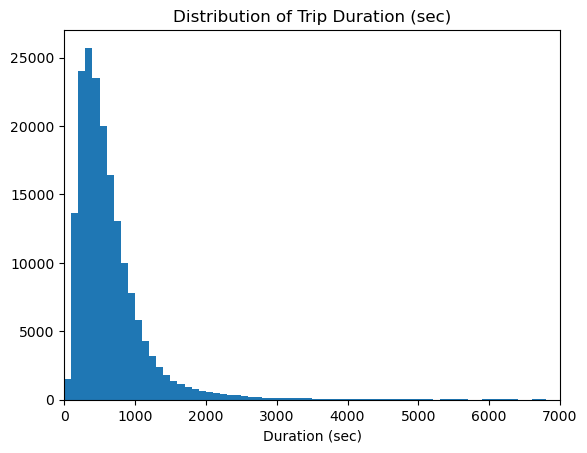

In [22]:
bins = np.arange(0,df.duration_sec.max()+100, 100)
plt.hist(x='duration_sec',data=df,bins=bins)
plt.xlim(0,7000)
plt.title('Distribution of Trip Duration (sec)')
plt.xlabel('Duration (sec)');

We can see majority of the trips are from 0sec to 1000 secs. Instead of doing mental calculation on how much it is in minutes we can convert the seconds to minutes and change the scale to a log.

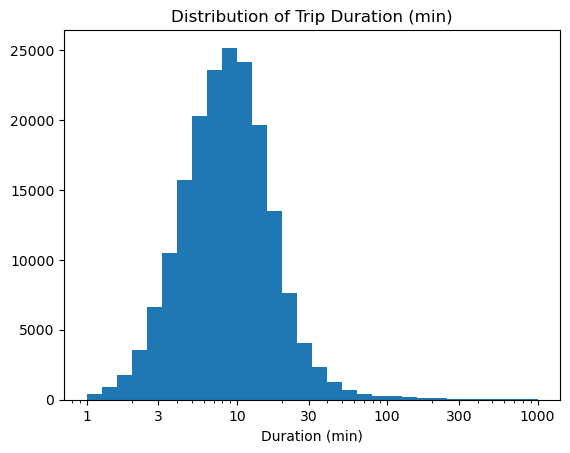

In [28]:
df['duration_min'] = df.duration_sec / 60
bins = 10**np.arange(0 , 3 + 0.1 , 0.1)
ticks = [1,3,10,30,100,300,1000]
labels = ['{}'.format(b) for b in ticks]
plt.hist(x='duration_min',data=df,bins=bins)
plt.xscale('log')
plt.title('Distribution of Trip Duration (min)')
plt.xticks(ticks,labels)
plt.xlabel('Duration (min)');

We can clearly see the peak is at ~ 10 minute mark.

### Q2: What's the percentage of subscribers and what which `user_type` consitutes the majority?

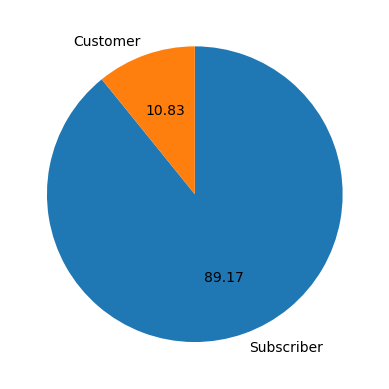

In [30]:
user_type_counts = df.user_type.value_counts()
plt.pie(user_type_counts,labels=user_type_counts.index,startangle = 90, counterclock = False,
        autopct='%.2f');

In this dataset subscribers count to 89% of the user base.

### Q3: What is the gender distribution in this dataset

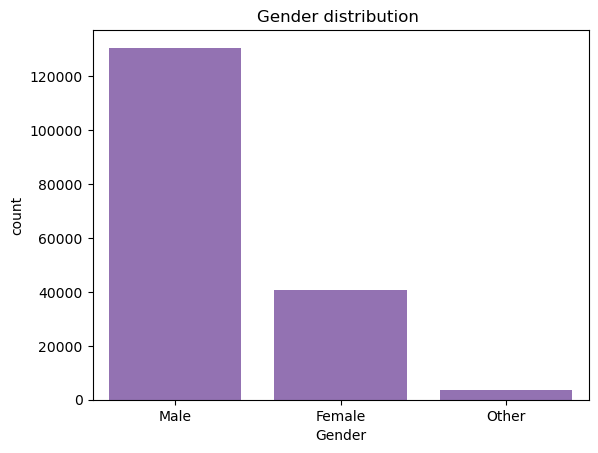

In [37]:
color = sb.color_palette()[4]
gender_order = df.member_gender.value_counts().index
sb.countplot(data=df,x='member_gender',order = gender_order,color=color)
plt.xlabel('Gender')
plt.title('Gender distribution ');

Users are exceedingly male with about 120,000 while females are 40,000 users

### Q4: Whats the percentage of users who are enrolled in the Bike Share for All programs

Text(0.5, 1.0, 'Percentage of users enrolled in the Bike Share for All program')

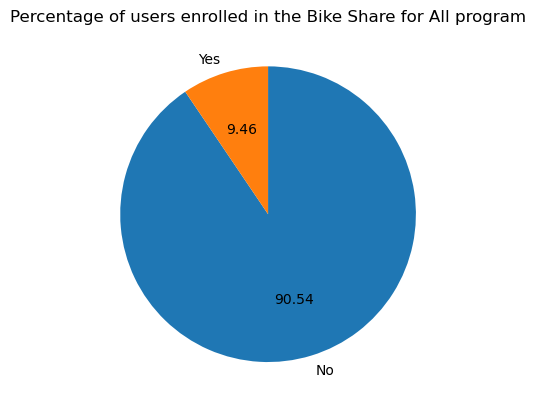

In [40]:
bike_share_counts = df.bike_share_for_all_trip.value_counts()
plt.pie(bike_share_counts,labels=bike_share_counts.index,startangle = 90, counterclock = False,
        autopct='%.2f')
plt.title('Percentage of users enrolled in the Bike Share for All program');

Most of the users are not enrolled in the Bike Share for All program

### Q5: For columns missing data, how much are they missing and whats the proportion?

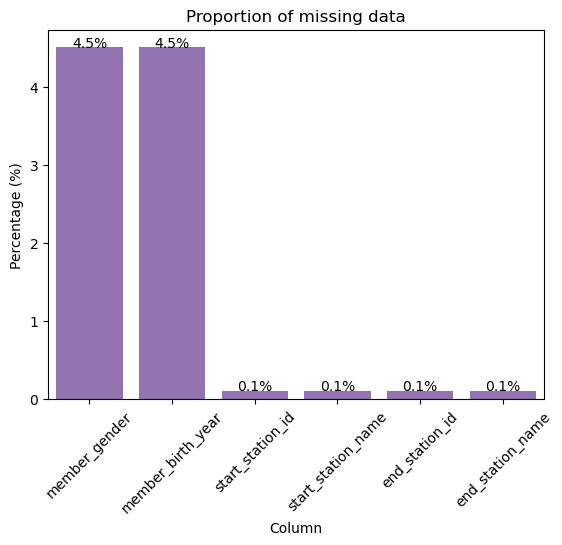

In [77]:
total_count = df.shape[0]

# Inorder to convert the member_birth_year to int we had to fillna with 0
# So that member_birth_year can show up in this visualization we will create a copy of the dataframe
# And set member_birth_year values that are 0 tp NaN
missing_data = df.copy()
missing_data.loc[missing_data.member_birth_year == 0,'member_birth_year'] = np.nan

na_counts = missing_data[['start_station_id','start_station_name','end_station_id',
                'end_station_name','member_gender','member_birth_year'
                ]].isna().sum() / total_count * 100
na_counts = na_counts.sort_values(ascending=False)
sb.barplot(x=na_counts.index.values, y=na_counts,order=na_counts.index, color=color)

plt.xticks(rotation=45) 

for i in range (na_counts.shape[0]):
    count = round(na_counts[i],1)

    plt.text(i, count+0.15, f'{count}%', ha = 'center', va='top')

plt.title('Proportion of missing data')
plt.xlabel('Column')
plt.ylabel('Percentage (%)');

`member_gender` and `member_birth_year` is missing 4.5% of the total data while the other columns are missing only 0.1%

### Q6: Distribution of `member_birth_year`

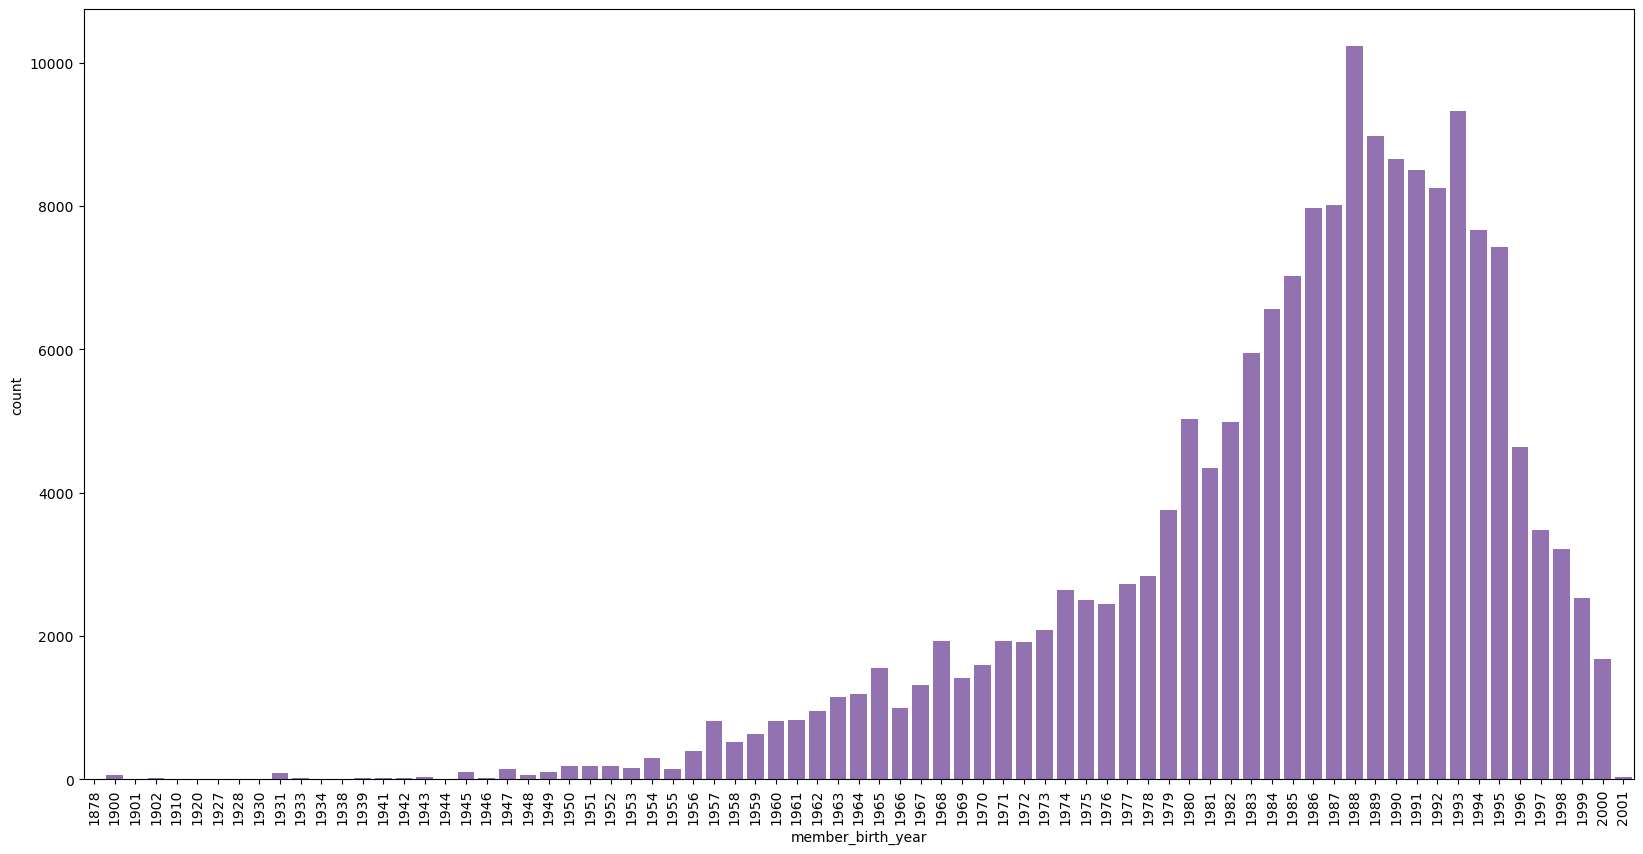

In [71]:
plt.figure(figsize=(20 , 10))
birth_year = df.query('member_birth_year>0')
sb.countplot(data=birth_year,x='member_birth_year',color=color)
plt.xticks(rotation = 90);

Most of the users were born around 1986 - 1995. To put this into context of age of the users , we will calculate it by subtracting 2019 from the birth_year since the data was from the year 2019. 

In [91]:
df.iloc[df.age == 2019] = np.NAN

In [81]:
df['age'] = 2019 - df.member_birth_year
df.age.describe()

count    183412.000000
mean        123.633868
std         411.850439
min          18.000000
25%          27.000000
50%          32.000000
75%          40.000000
max        2019.000000
Name: age, dtype: float64

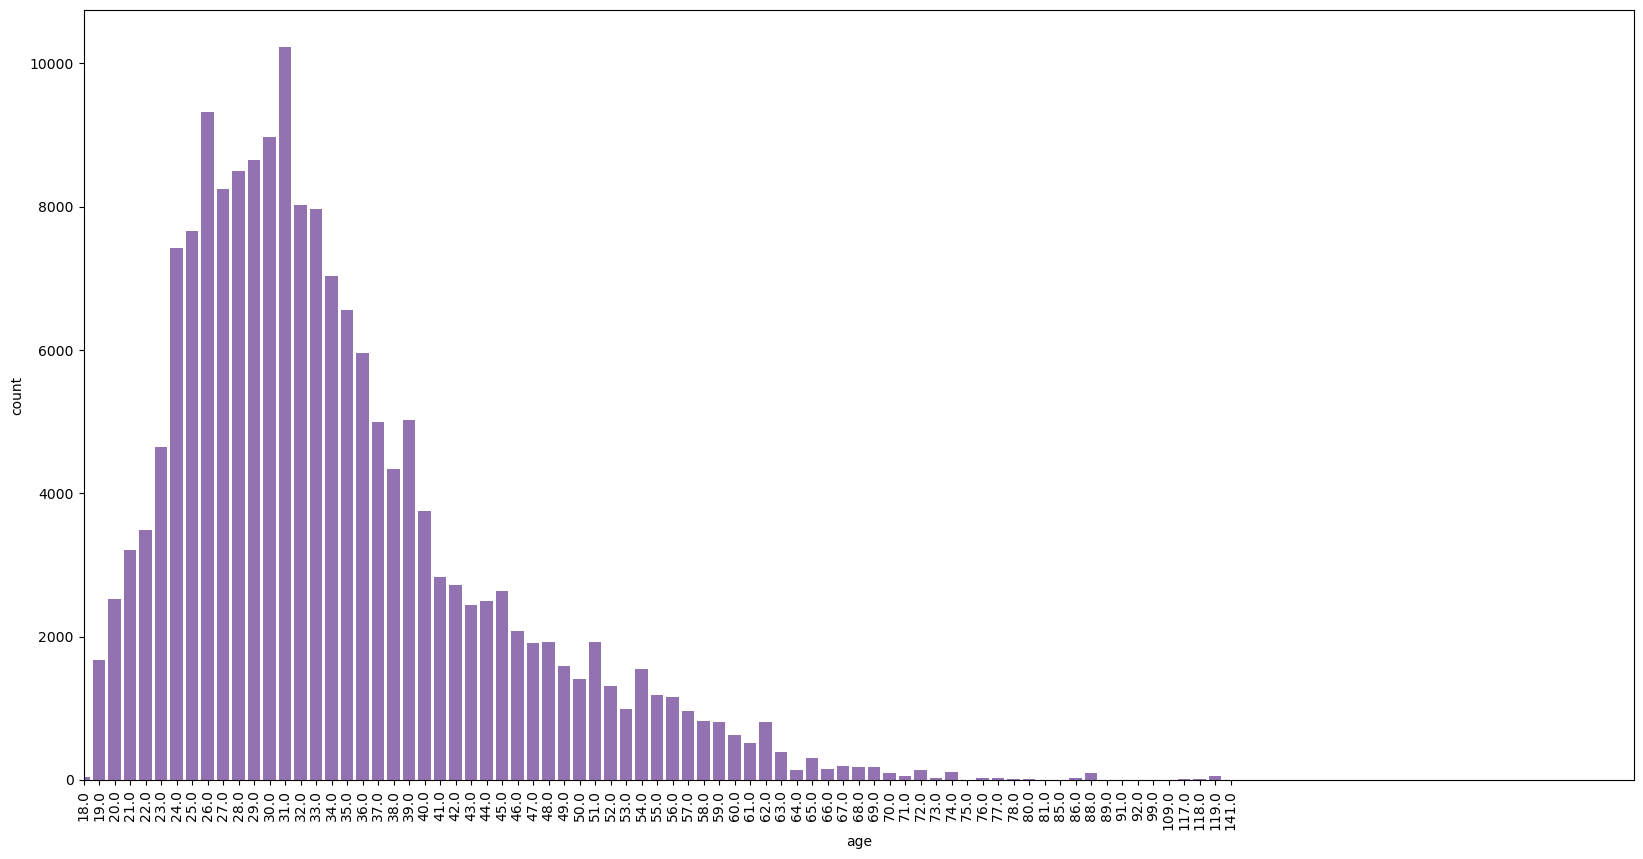

In [92]:
fig, ax = plt.subplots(figsize=(20 , 10))
sb.countplot(x='age',data=df,color=color)
plt.xticks(rotation=90)
ax.set(xlim = (0,100));



>**Rubric Tip**: Visualizations should depict the data appropriately so that the plots are easily interpretable. You should choose an appropriate plot type, data encodings, and formatting as needed. The formatting may include setting/adding the title, labels, legend, and comments. Also, do not overplot or incorrectly plot ordinal data.

### Discuss the distribution(s) of your variable(s) of interest. Were there any unusual points? Did you need to perform any transformations?

> Your answer here!

### Of the features you investigated, were there any unusual distributions? Did you perform any operations on the data to tidy, adjust, or change the form of the data? If so, why did you do this?

> Your answer here!

## Bivariate Exploration

> In this section, investigate relationships between pairs of variables in your
data. Make sure the variables that you cover here have been introduced in some
fashion in the previous section (univariate exploration).

### Talk about some of the relationships you observed in this part of the investigation. How did the feature(s) of interest vary with other features in the dataset?

> Your answer here!

### Did you observe any interesting relationships between the other features (not the main feature(s) of interest)?

> Your answer here!

## Multivariate Exploration

> Create plots of three or more variables to investigate your data even
further. Make sure that your investigations are justified, and follow from
your work in the previous sections.

### Talk about some of the relationships you observed in this part of the investigation. Were there features that strengthened each other in terms of looking at your feature(s) of interest?

> Your answer here!

### Were there any interesting or surprising interactions between features?

> Your answer here!

## Conclusions
>You can write a summary of the main findings and reflect on the steps taken during the data exploration.



> Remove all Tips mentioned above, before you convert this notebook to PDF/HTML


> At the end of your report, make sure that you export the notebook as an
html file from the `File > Download as... > HTML or PDF` menu. Make sure you keep
track of where the exported file goes, so you can put it in the same folder
as this notebook for project submission. Also, make sure you remove all of
the quote-formatted guide notes like this one before you finish your report!

